In [ ]:
# Imports

from RPiCameraApp import RPiCameraApp
from RPiLedMatrix import RPiLedMatrix
from picamera2 import Picamera2
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
import numpy as np
 

In [5]:
import numpy as np

In [2]:
# Functions

# Convert color array to grayscale array
def convert_to_grayscale(image_array):
    image = Image.fromarray(image_array.astype(np.uint8)) # convert to pillow object
    grayscale_image = image.convert("L") # conversion to gray
    return np.array(grayscale_image) # return grayscale array

# Find the differential phase contrast image of two input images
def calculate_dpc(img_array_L, img_array_R):
    img_array_L = img_array_L.astype(np.float32)
    img_array_R = img_array_R.astype(np.float32)
    img_array_DPC = (img_array_L - img_array_R) / (img_array_L + img_array_R)  # find difference and normalise
    return img_array_DPC


                
        



In [5]:
# bright field and dark field using camera app

led_matrix = RPiLedMatrix()
led_matrix.set_rotation(0)
# led_matrix.show_circle(radius=4, color='black', outside_color='white') # darkfield
led_matrix.show_circle(radius=8, color='white') # brightfield

camera_app = RPiCameraApp()
camera_app.run()

led_matrix.off()
led_matrix.close()


[0:52:12.394036157] [2478]  INFO Camera camera_manager.cpp:316 libcamera v0.3.1+50-69a894c4
[0:52:12.408999115] [2858]  INFO RPI pisp.cpp:695 libpisp version v1.0.7 28196ed6edcf 29-08-2024 (16:33:32)
[0:52:12.428812485] [2858]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@80000/imx296@1a to CFE device /dev/media0 and ISP device /dev/media1 using PiSP variant BCM2712_C0
[0:52:12.433852507] [2478]  INFO Camera camera.cpp:1191 configuring streams: (0) 1456x1088-BGR888 (1) 1456x1088-YUV420 (2) 1456x1088-BGGR_PISP_COMP1
[0:52:12.433994655] [2858]  INFO RPI pisp.cpp:1450 Sensor: /base/axi/pcie@120000/rp1/i2c@80000/imx296@1a - Selected sensor format: 1456x1088-SBGGR10_1X10 - Selected CFE format: 1456x1088-PC1B
[0:52:12.438815141] [2478]  INFO Camera camera.cpp:1191 configuring streams: (0) 640x480-XBGR8888 (1) 1456x1088-BGGR_PISP_COMP1
[0:52:12.439023863] [2858]  INFO RPI pisp.cpp:1450 Sensor: /base/axi/pcie@120000/rp1/i2c@80000/imx296@1a - Selected sensor format: 14

HdrMode
<class 'int'>
0
AeFlickerPeriod
<class 'int'>
100
AeFlickerMode
<class 'int'>
0
StatsOutputEnable
<class 'bool'>
False
Other controls ['HdrMode', 'AeFlickerPeriod', 'AeFlickerMode', 'StatsOutputEnable']
Not setting pic controls when not visible
Not setting vid controls when not visible
Not setting vid controls when not visible
Switch to photo
Switching to preview
Not setting vid controls when not visible
Not setting pic controls when not visible


[0:52:12.812921453] [2478]  INFO Camera camera.cpp:1191 configuring streams: (0) 640x480-XBGR8888 (1) 1456x1088-BGGR_PISP_COMP1
[0:52:12.813181730] [2858]  INFO RPI pisp.cpp:1450 Sensor: /base/axi/pcie@120000/rp1/i2c@80000/imx296@1a - Selected sensor format: 1456x1088-SBGGR10_1X10 - Selected CFE format: 1456x1088-PC1B


Not setting vid controls when not visible
Not setting pic controls when not visible
Switching to still
Not setting vid controls when not visible
Not setting pic controls when not visible
Not setting vid controls when not visible
Not setting pic controls when not visible
Switching to preview
Not setting vid controls when not visible
Not setting pic controls when not visible
Not setting vid controls when not visible
Not setting pic controls when not visible
Switching to still
Not setting vid controls when not visible
Not setting pic controls when not visible
Not setting vid controls when not visible
Not setting pic controls when not visible
Switching to preview
Not setting vid controls when not visible
Not setting pic controls when not visible


[0:52:13.389076749] [2478]  INFO Camera camera.cpp:1191 configuring streams: (0) 1456x1088-BGR888 (1) 1456x1088-YUV420 (2) 1456x1088-BGGR_PISP_COMP1
[0:52:13.391693112] [2858]  INFO RPI pisp.cpp:1450 Sensor: /base/axi/pcie@120000/rp1/i2c@80000/imx296@1a - Selected sensor format: 1456x1088-SBGGR10_1X10 - Selected CFE format: 1456x1088-PC1B
[0:52:13.454434156] [2478]  INFO Camera camera.cpp:1191 configuring streams: (0) 800x596-XBGR8888 (1) 1456x1088-BGGR_PISP_COMP1
[0:52:13.457465944] [2858]  INFO RPI pisp.cpp:1450 Sensor: /base/axi/pcie@120000/rp1/i2c@80000/imx296@1a - Selected sensor format: 1456x1088-SBGGR10_1X10 - Selected CFE format: 1456x1088-PC1B
[0:52:13.518725530] [2478]  INFO Camera camera.cpp:1191 configuring streams: (0) 1456x1088-BGR888 (1) 1456x1088-YUV420 (2) 1456x1088-BGGR_PISP_COMP1
[0:52:13.521691855] [2858]  INFO RPI pisp.cpp:1450 Sensor: /base/axi/pcie@120000/rp1/i2c@80000/imx296@1a - Selected sensor format: 1456x1088-SBGGR10_1X10 - Selected CFE format: 1456x1088-PC1

Not setting vid controls when not visible
Not setting pic controls when not visible


QSocketNotifier: Invalid socket 74 and type 'Read', disabling...


In [4]:
# set up camera
camera = Picamera2()
capture_config = camera.create_still_configuration(main={"size": (2500, 2500)}, controls = {"ExposureTime": 150000, "AnalogueGain": 1})
camera.configure(capture_config)
camera.start()

[0:15:18.350623067] [2737]  INFO Camera camera_manager.cpp:316 libcamera v0.3.1+50-69a894c4
[0:15:18.359882476] [2904]  INFO RPI pisp.cpp:695 libpisp version v1.0.7 28196ed6edcf 29-08-2024 (16:33:32)
[0:15:18.373762331] [2904]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@88000/imx708@1a to CFE device /dev/media1 and ISP device /dev/media0 using PiSP variant BCM2712_C0
[0:15:18.379315570] [2737]  INFO Camera camera.cpp:1191 configuring streams: (0) 2500x2500-BGR888 (1) 4608x2592-BGGR_PISP_COMP1
[0:15:18.379675624] [2904]  INFO RPI pisp.cpp:1450 Sensor: /base/axi/pcie@120000/rp1/i2c@88000/imx708@1a - Selected sensor format: 4608x2592-SBGGR10_1X10 - Selected CFE format: 4608x2592-PC1B


In [6]:
# stop camera
camera.stop()
camera.close()

Text(0.5, 1.0, 'Right Image')

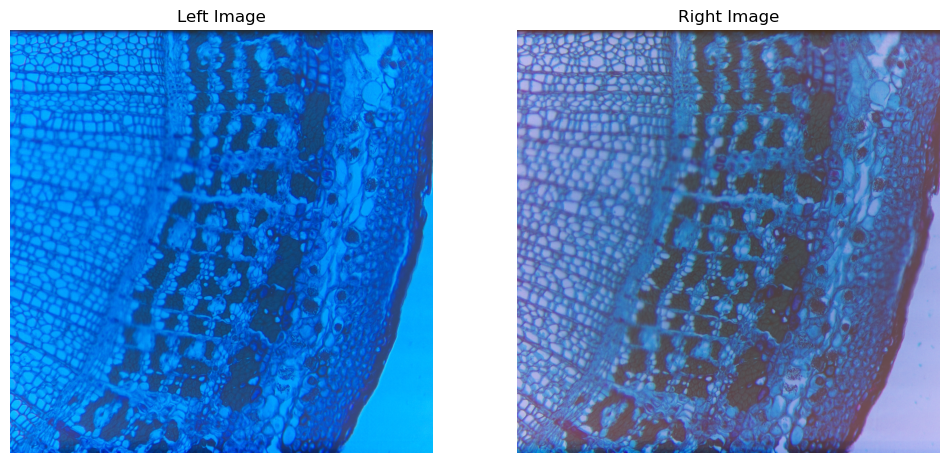

In [7]:
# Image gathering for DPC

# set up LEDs
led_matrix = RPiLedMatrix()
led_matrix.set_rotation(135)

led_matrix.show_circle(radius=4,color='white', half='left')
time.sleep(1)
left_array = camera.capture_array() # capture image array
left_img = Image.fromarray(left_array) # convert to pillow image object
left_img.save('images/left.png') # save pillow image

led_matrix.show_circle(radius=4,color='white', half='right')
time.sleep(1)
right_array = camera.capture_array()
right_img = Image.fromarray(right_array)
right_img.save('images/right.png')



led_matrix.off()

# Plot the image using matplotlib
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(left_img) # can use either the pillow image or numpy array
ax[0].axis('off')  # Hide the axis
ax[0].set_title("Left Image")


# Plot the image using matplotlib
ax[1].imshow(right_img)
ax[1].axis('off')  # Hide the axis
ax[1].set_title("Right Image")



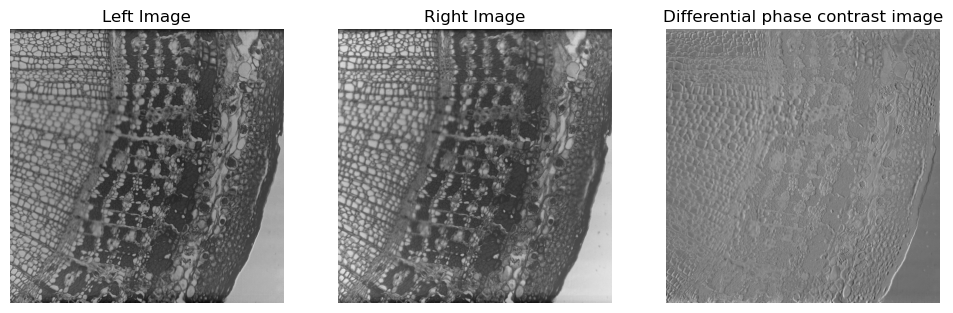

In [25]:
# Do DPC

# load images as numpy arrays
left_img = Image.open('images/left.png') # pillow image
left_arr = np.array(left_img) # numpy array
left_arr_gray = convert_to_grayscale(left_arr) # grayscale array

right_img = Image.open('images/right.png')
right_arr = np.array(right_img)
right_arr_gray = convert_to_grayscale(right_arr)

# differential phase contrast image 
gray_dpc_arr = calculate_dpc(left_arr_gray,right_arr_gray)

# save
gray_dcp_img = Image.fromarray(gray_dpc_arr).convert('L')
gray_dcp_img.save(os.path.join('images','dpc.png')) # doesnt work

fig, ax = plt.subplots(1,3, figsize=(12,6))
ax[0].imshow(left_arr_gray,cmap='gray') # to display grayscale include color map gray (otherwise looks green)
ax[0].axis('off')  # Hide the axis
ax[0].set_title("Left Image")


ax[1].imshow(right_arr_gray,cmap='gray')
ax[1].axis('off')  # Hide the axis
ax[1].set_title("Right Image")

ax[2].imshow(gray_dpc_arr,cmap='gray')
ax[2].axis('off')  # Hide the axis
ax[2].set_title("Differential phase contrast image")

plt.imsave('dpc.png',gray_dpc_arr, cmap='gray') # to save grayscale dpc (data not uint8)



In [6]:
camera.stop()
camera.close()
led_matrix.off()

In [33]:
# Gather grayscale images for Fourier ptychography, uses entire LED array space no matter what gridSize is inputed. Version 1.

led_matrix = RPiLedMatrix()
led_matrix.set_rotation(135) # ensure 0,0 is bottom left pixel

# set up camera
sz_x = 1000 # can go up to 2500 for square image
sz_y = sz_x
crop_size = 100 # we will crop image to reduce size of data
exposure = 300000
camera = Picamera2()
# capture_config = camera.create_still_configuration(main={"size": (sz_x, sz_y)}, controls = {'AeEnable': True, "AnalogueGain": 1})
capture_config = camera.create_still_configuration(main={"size": (sz_x, sz_y)}, controls = {'ExposureTime':500000, "AnalogueGain": 1})
camera.configure(capture_config)
camera.start()

gridSize = 2 # can be 16,8,4,2, captures gridSize^2 images
# spacing = 3.3*16/gridSize # distance between LEDs in mm

x = np.zeros(gridSize) # coordinates for LEDs in LED units
data = np.zeros((gridSize,gridSize,crop_size,crop_size)) # empty array with correct dimensions to store images

# set coordinates
for i in range(gridSize):
    x[i] = i*16/gridSize
y = x # y coordinates are the same

for i in range(gridSize): # starts in bottom left, moving up and then across when LED reaches top
    for j in range(gridSize):
        led_matrix.show_pixel(int(x[i]),int(y[j]),brightness=1)
        time.sleep(1) # short pause for camera
        img_arr = camera.capture_array()
        print(camera.capture_metadata()['ExposureTime'])
        img_arr_cropped = img_arr[400:400+crop_size,400:400+crop_size] # only take the central portion
        img_arr_gray = convert_to_grayscale(img_arr_cropped)
        data[(gridSize-1)-j][i] = img_arr_gray # store data such that data[0][0] is top left LED (map grid coords to matrix indexing)
        
np.save('FPM_data/rename_me.npy', data) # save numpy array
        
        
led_matrix.off()
camera.stop()
camera.close()


[0:45:07.483547408] [3101]  INFO Camera camera_manager.cpp:316 libcamera v0.3.1+50-69a894c4
[0:45:07.500380191] [3144]  INFO RPI pisp.cpp:695 libpisp version v1.0.7 28196ed6edcf 29-08-2024 (16:33:32)
[0:45:07.521212250] [3144]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@88000/imx708@1a to CFE device /dev/media1 and ISP device /dev/media0 using PiSP variant BCM2712_C0
[0:45:07.527373135] [3101]  INFO Camera camera.cpp:1191 configuring streams: (0) 1000x1000-BGR888 (1) 2304x1296-BGGR_PISP_COMP1
[0:45:07.527613392] [3144]  INFO RPI pisp.cpp:1450 Sensor: /base/axi/pcie@120000/rp1/i2c@88000/imx708@1a - Selected sensor format: 2304x1296-SBGGR10_1X10 - Selected CFE format: 2304x1296-PC1B


499635
499635
499635
499635


In [ ]:
# Visualise data
data = np.load('FPM_data/rename_me.npy')
# gridSize = 8 # grid size used to gather data

fig, ax = plt.subplots(gridSize,gridSize, figsize=(16,16))

for i in range(gridSize):
    for j in range(gridSize):
        ax[i][j].imshow(data[i][j], cmap = 'gray') 
        ax[i][j].axis('off')




It seems the resolution for images taken with LEDs far from center are very low. Increasing exposure time did not help... Best to light up LEDs in center of array (center is a 2x2 square), then with this symmetry we can see exactly where the resolution drops off. The data array stores image arrays, which are uncompressed, so the data.npy file is too big. Instead the images should be compressed to PNG first and then stored like this.

In [9]:
camera.stop()
camera.close()

In [1]:
# Generate x,y coordinates for LEDs to turn on top left to bottom right for a given gridSize (n)
def generateCoords(n):
    if not (isinstance(n, int) and 1 <= n <= 16):
        return 0
    else:
        x = np.array([])
        y = x
        for j in range(n):
            for i in range(n):
                x = np.append(x, i + 8 - np.ceil(n/2)) # magic formula for x
                y = np.append(y, 7 - j + np.floor(n/2)) # magic formula for y
        return x,y

In [6]:
x,y = generateCoords(8)

In [13]:
# Gather grayscale images for Fourier ptychography. Version 2.
# Use central pixels and more efficient data storage. 

output_folder = 'FPM_data_2/talia/10x10' # should be an empty folder
gridSize = 1 # 1-16, number of images will be gridSize^2

led_matrix = RPiLedMatrix()
led_matrix.set_rotation(135) # ensure 0,0 is bottom left pixel

# set up camera - way to automate?
exposure = 50000 # in us
crop_start_x = 0 # from left of image
crop_start_y = 0 # from top of image
crop_size = 1000
camera = Picamera2()
still_config = camera.create_still_configuration(main={'size':(1456,1088)}, controls = {'ExposureTime':exposure, "AnalogueGain": 1})
camera.configure(still_config)
camera.start()

x,y = generateCoords(gridSize) # generates arrays for x and y to turn on LEDs from top left to bottom right, centered in middle of LED array

for i in range(len(x)):
        led_matrix.show_pixel(int(x[i]),int(y[i]),brightness=1)
        time.sleep(0.1) # short pause for LED
        img_arr = camera.capture_array()[crop_start_y:crop_start_y+crop_size,crop_start_x:crop_start_x+crop_size] # capture and crop
        img_pil = Image.fromarray(img_arr) # convert to pillow object
        img_pil_gray = img_pil.convert('L') # convert to grayscale 
        
        img_path = os.path.join(output_folder, f'image_{i}.png') # create path name
        img_pil_gray.save(img_path, format='PNG') # save as png 
        
        
led_matrix.off()
camera.stop()
camera.close()


[1:18:59.586075114] [3148]  INFO Camera camera.cpp:1191 configuring streams: (0) 1456x1088-BGR888 (1) 1456x1088-BGGR_PISP_COMP1
[1:18:59.586936500] [3087]  INFO RPI pisp.cpp:1450 Sensor: /base/axi/pcie@120000/rp1/i2c@80000/imx296@1a - Selected sensor format: 1456x1088-SBGGR10_1X10 - Selected CFE format: 1456x1088-PC1B


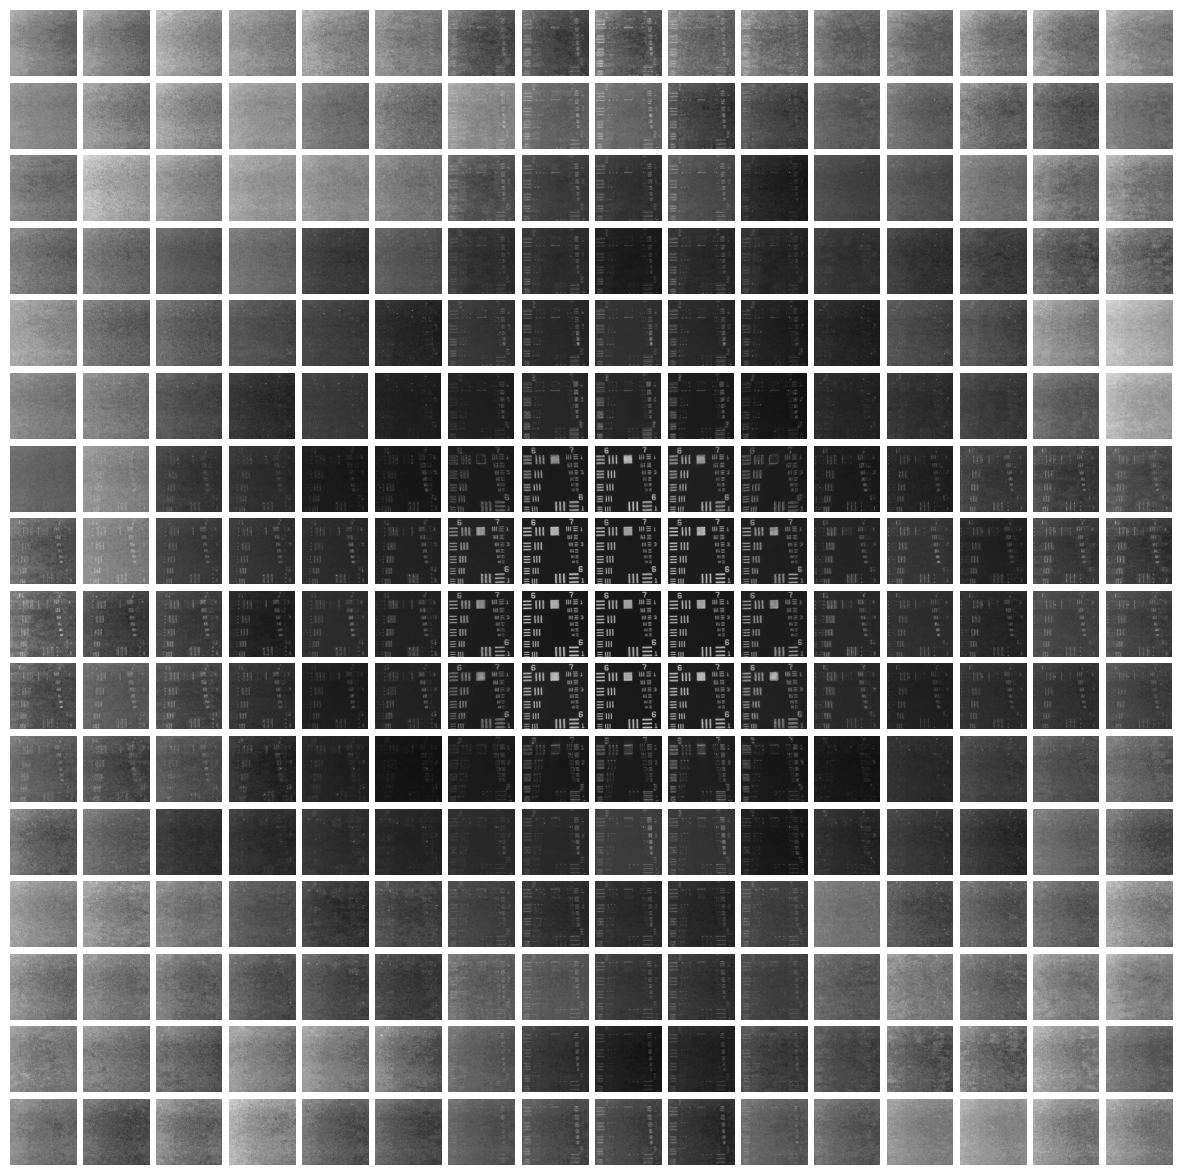

In [16]:
# Display nxn images in a grid 
# output_folder = 'FPM_data/usaf/6x6'
# gridSize = 6

fig, axes = plt.subplots(gridSize, gridSize, figsize=(15,15))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(gridSize*gridSize):
    image = Image.open(os.path.join(output_folder,f'image_{i}.png'))
    row,col = divmod(i, gridSize)
    axes[row,col].imshow(image, cmap='gray')
    axes[row,col].axis('off')
 